## Spain explore

In [ ]:
df_lut <- data.frame(
  Description = c("Water", "Trees", "Flooded vegetation", "Crops", "Built Area", "Bare ground", "Snow/Ice", "Clouds", "Rangeland"),
  Value = c(1, 2, 4, 5, 7, 8, 9, 10, 11),
  Color = c("#1f77b4", "#2ca02c", "#17becf", "#ff7f0e", "#9467bd", "#8c564b", "#e377c2", "#7f7f7f", "#bcbd22")
)

raster_path <- "../data/10m_lulc/SPAIN_2023_LULC.tif"
aoi_path <- "../data/aoi/AoI_Spain_3eData.geojson"# Load the AOI polygon
aoi <- st_read(aoi_path)
aoi <- st_transform(aoi, crs = 32629)

Reading layer `AoI_Ancares_Courel' from data source 
  `/data/aoi/AoI_Spain_3eData.geojson' using driver `GeoJSON'
Simple feature collection with 1 feature and 1 field
Geometry type: POLYGON
Dimension:     XY
Bounding box:  xmin: -7.508481 ymin: 42.35214 xmax: -6.690546 ymax: 43.12936
Geodetic CRS:  WGS 84


In [ ]:
# Load the raster file
print("Loading raster file...")
raster <- rast(raster_path)
print("Raster file loaded.")

summary(raster)

[1] "Loading raster file..."
[1] "Raster file loaded."


Warning message:
“[summary] used a sample”


 SPAIN_2023_LULC
 Min.   : 1.00  
 1st Qu.: 2.00  
 Median : 5.00  
 Mean   : 5.82  
 3rd Qu.:11.00  
 Max.   :11.00  
 NA's   :77897  

In [ ]:
# Mask the raster with the AOI
print("Masking raster with AOI...")
masked_raster <- mask(raster, vect(aoi))
print("Raster masked with AOI.")

# times out!

## Zambia explore

In [ ]:
df_lut <- data.frame(
  Description = c("Water", "Trees", "Flooded vegetation", "Crops", "Built Area", "Bare ground", "Snow/Ice", "Clouds", "Rangeland"),
  Value = c(1, 2, 4, 5, 7, 8, 9, 10, 11),
  Color = c("#1f77b4", "#2ca02c", "#17becf", "#ff7f0e", "#9467bd", "#8c564b", "#e377c2", "#7f7f7f", "#bcbd22")
)

raster_path <- "../data/10m_lulc/ZAMBIA_2023_35L_20230101-20240101.tif"
aoi_path <- "../data/aoi/AoI_Zambia_By_Life_Connected.geojson"
# Load the AOI polygon
aoi <- st_read(aoi_path)
aoi <- st_transform(aoi, crs = 32735)

terra 1.7.83

Linking to GEOS 3.12.2, GDAL 3.9.3, PROJ 9.4.1; sf_use_s2() is TRUE



Reading layer `AoI_Mponda' from data source 
  `C:\SD\correlaid_sensingclues\environmental-time-series\data\aoi\AoI_Zambia_By_Life_Connected.geojson' 
  using driver `GeoJSON'
Simple feature collection with 1 feature and 1 field
Geometry type: POLYGON
Dimension:     XY
Bounding box:  xmin: 26.77027 ymin: -15.1321 xmax: 26.92342 ymax: -14.85555
Geodetic CRS:  WGS 84


In [3]:
# Load the raster file
print("Loading raster file...")
raster <- rast(raster_path)
print("Raster file loaded.")

summary(raster)

[1] "Loading raster file..."


[1] "Raster file loaded."


Warning message:
"[summary] used a sample"


 ZAMBIA_2023_35L_20230101.20240101
 Min.   : 1.000                   
 1st Qu.: 2.000                   
 Median : 2.000                   
 Mean   : 4.991                   
 3rd Qu.:11.000                   
 Max.   :11.000                   
 NA's   :1480                     

In [4]:
# Mask the raster with the AOI
print("Masking raster with AOI...")
masked_raster <- mask(raster, vect(aoi))
print("Raster masked with AOI.")

[1] "Masking raster with AOI..."


[1] "Raster masked with AOI."             


In [ ]:
# Get the bounding box of the AOI
bbox <- sf::st_bbox(vect(aoi))

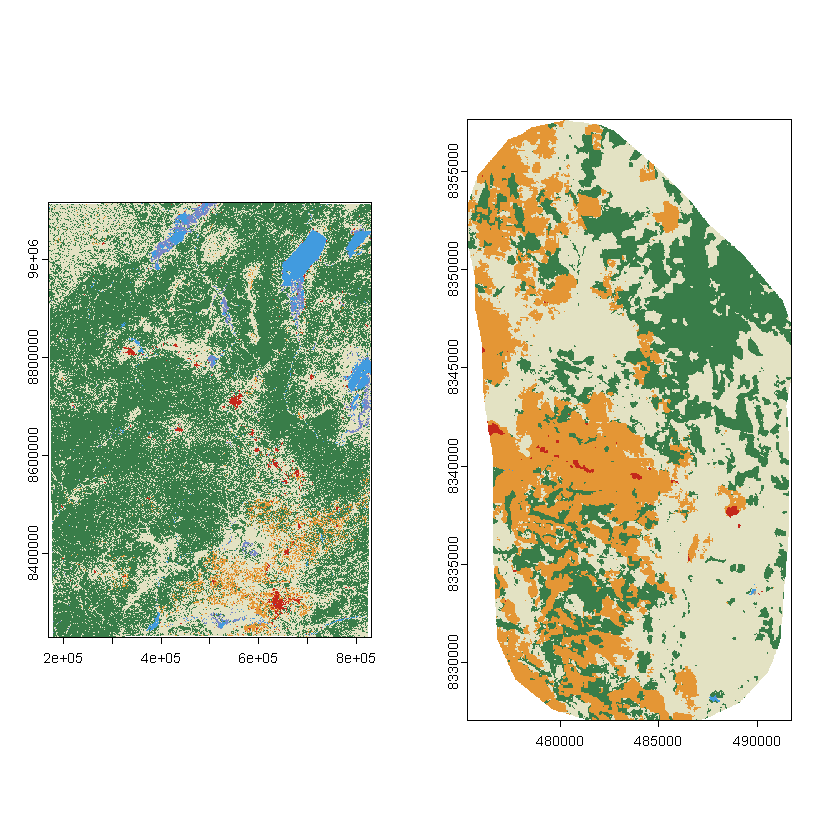

In [9]:
par(mfrow=c(1,2))
plot(raster)
plot(masked_raster, xlim = c(bbox["xmin"], bbox["xmax"]), ylim = c(bbox["ymin"], bbox["ymax"]))

In [18]:
cell_count <- sum(!is.na(values(masked_raster)))
print(cell_count)

ERROR: Error: std::bad_alloc


In [16]:
# Get the values from the masked raster and filter out NA values
print("Extracting values from masked raster...")
vals <- raster::values(masked_raster)

[1] "Extracting values from masked raster..."


ERROR: Error: std::bad_alloc


In [ ]:
# Get the values from the masked raster and filter out NA values
print("Extracting values from masked raster...")
values <- values(masked_raster)
values <- values[!is.na(values)]
print("Values extracted and filtered.")

# Count the occurrences of each class
print("Counting occurrences of each class...")
class_distribution <- table(values)
print("Class occurrences counted.")

# Convert to a data frame and merge with df_lut
print("Merging class distribution with lookup table...")
class_distribution_df <- as.data.frame(class_distribution, stringsAsFactors = FALSE)
colnames(class_distribution_df) <- c('Value', 'Count')
result_df <- merge(class_distribution_df, df_lut, by = 'Value')
print("Class distribution merged with lookup table.")

# Calculate the area in square meters
print("Calculating area in square kilometers...")
result_df$Area_sq_km <- result_df$Count * pixel_resolution * pixel_resolution / 1000000

# Calculate the percentage cover of total AOI for each class
print("Calculating percentage cover for each class...")
total_area <- sum(result_df$Area_sq_km)
result_df$Percentage_Cover <- (result_df$Area_sq_km / total_area) * 100
print("Percentage cover calculated.")

print("Final result:")
print(result_df[order(-result_df$Count), c('Description', 'Area_sq_km', 'Percentage_Cover', 'Count')])